In [85]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from math import pow
plt.style.use('ggplot')

np.random.seed(1)

In [86]:
N = 64
unknows = N-1
x = np.linspace(0, 1, endpoint=True, num=N+1)

0.015625 0.015625


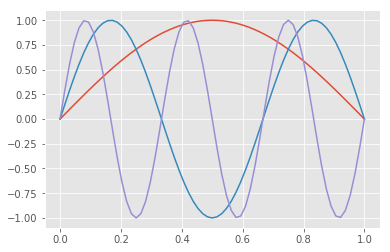

In [87]:

print x[1], 1.0/N
for k in [1, 3, 6]:
    plt.plot(x, np.sin(x*k*np.pi))

# Weight Jacobi

In [88]:
def operador(N):
    A = np.zeros((N, N))
    for i in range(N):
        A[i][i] = 2.0
        if i > 0: 
            A[i][i-1] = -1.0
        if i < N-1:
            A[i][i+1] = -1.0
    return A
        
def Jacobi(u, u_ant, f):
    for i in range(1, len(u) - 1):
        u[i] = 0.5*(h*h*f(i*h) + u_ant[i-1] + u_ant[i+1])    
                             

def Weighted_Jacobi(u, u_ant, w, tol=0.0, min_iter=0, max_iter=float('inf')):
    I = np.identity(unknows)
    A = operador(unknows)
    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)   
    Rj = w*np.dot(LA.inv(D), L + U)
    Rw = (1-w)*I + w*Rj
    erros = []
    erros.append(LA.norm(u_ant, ord=np.inf))
    
    iteracoes = 0
    while iteracoes < min_iter or (erros[-1]>tol and iteracoes < max_iter):
        Weighted_Jacobi_Step(u[1:-1], u_ant[1:-1], Rw, w)
        Weighted_Jacobi_Step(u_ant[1:-1], u[1:-1], Rw,w)

        iteracoes += 2
        erros.append(LA.norm(u_ant, ord=np.inf))
    
    
    return erros, iteracoes


def Weighted_Jacobi_Step(u, u_ant, Rw, w, f=lambda x: 0.0):
    #u[:] = np.dot(Rw, u_ant)
    for i in xrange(len(u)):
        u[i] = (1-w)*u_ant[i]
        if i > 0:
            u[i] += (w/2.0)*u_ant[i-1]
        if i < len(u)-1:
            u[i] += (w/2.0)*u_ant[i+1]

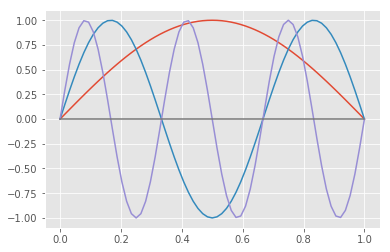

In [89]:
u = 2*(np.random.rand(N+1) - 0.5)
u[0]=u[-1]=0.0


u0 = np.sin(x*np.pi)
u1 = np.sin(3*x*np.pi)
u2 = np.sin(6*x*np.pi)
u3 = (1.0/3)*(u0 + u1 + u2)

plt.plot(x, u0)
plt.plot(x, u1)
plt.plot(x, u2)
plt.plot(x, np.zeros(N+1))


## Erro para condição inicial com vários módulos

$v_0 = \frac{1}{3}(sin(\frac{i\pi}{N} + + )$

100


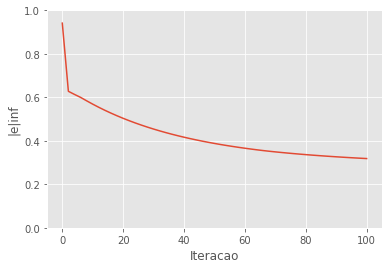

In [90]:

w = 2.0/3
u3 = (1.0/3)*( np.sin(x*np.pi) +  np.sin(6*x*np.pi) +  np.sin(32*x*np.pi))
u_ant = np.copy(u3)
erros, iteracoes = Weighted_Jacobi(u, u_ant, w, max_iter=100)  
print iteracoes


plt.plot(range(0,iteracoes+1,2), erros)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.0,1.0))
plt.xlabel("Iteracao")
plt.ylabel("|e|inf")

# Autovalores e autovetores da matriz

Weighted Jacobi

$u^{(new)} = [(1-\omega)I + \omega D^{-1}(L+U)]u^{old} + wh^2D^{-1}f$

$R_\omega  = [(1-\omega)I + \omega D^{-1}(L+U)]$

$R_\omega = I -\frac{\omega}{2} \begin{bmatrix}
 2 & -1 &    &    & \\ 
-1 &  2 & -1 &    & \\ 
   & -1 &  2 & -1 & \\ 
   &    & \ddots &  \ddots   & \ddots \\ 
   &    & -1 &  2   & -1
\end{bmatrix}$

$R_\omega = I -\frac{\omega}{2} A^\prime$

Os autovetores de $R_w$ são os mesmos de $A^\prime$, pois, seja $v$ um autovalor de $A^\prime$ e $\lambda$ seu autovalor correspondente

$R_wv = (I -\frac{\omega}{2} A^\prime)v$

$R_wv = (v -\frac{\omega}{2} A^\prime v) = v -\frac{\omega}{2} \lambda v = (1 - \frac{\omega}{2}\lambda)v $

$\lambda(R_w) = (1 - \frac{\omega}{2}\lambda(A^\prime))$

Os autovetores de $A^\prime$ são $w_{k,j} = sen(\frac{K\pi i}{N})$, pois:

$2 sen(\frac{K\pi i}{N}) - sen(\frac{K\pi (i-1)}{N}) - sen(\frac{K\pi (i+1)}{N}) 
=
sen(\frac{K\pi i}{N}) - sen(\frac{K\pi (i-1)}{N}) + sen(\frac{K\pi i}{N} - sen(\frac{K\pi (i+1)}{N}) )$


$ = 2sen(\frac{k\pi}{2N})cos(\frac{k\pi(2i-1)}{2N}) + 2sen(-\frac{k\pi}{2N})cos(\frac{k\pi(2i+1)}{2N})$

$ = 2sen(\frac{k\pi}{2N})cos(\frac{k\pi(2i-1)}{2N}) + 2sen(-\frac{k\pi}{2N})cos(\frac{k\pi(2i+1)}{2N})$

$ = 2sen(\frac{k\pi}{2N})[cos(\frac{k\pi(2i-1)}{2N}) - cos(\frac{k\pi(2i+1)}{2N})]$

$ = 2sen(\frac{k\pi}{2N}) * [-2 sen(\frac{k\pi4i)}{4N})sen(\frac{-2k\pi}{4N})]$

$ = 2sen(\frac{k\pi}{2N}) * [2 sen(\frac{k\pi i)}{N})sen(\frac{k\pi}{2N})]$

$ = 4sen^2(\frac{k\pi}{2N}) sen(\frac{k\pi i}{N})$

Além disso, os autovalores são $\lambda_k= 4sen^2(\frac{k\pi}{2N})$

In [1]:
w = 2.0/3.0

for k in [1, 3, 6, 8]:
    u_ant = np.sin(k*np.pi*x)
    erros, iteracoes = Weighted_Jacobi(u, u_ant, w, max_iter=100)  
    plt.plot(range(0,iteracoes+1,2), erros, label="k=%d"%k)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('|e|inf')
plt.xlabel('Iteracao')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0.0,1.05))



NameError: name 'np' is not defined

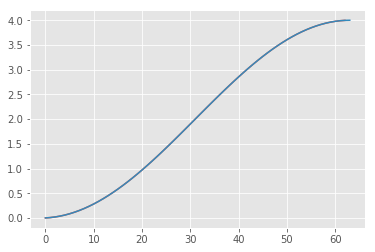

In [92]:
A = operador(N-1)
lambdas, vs = LA.eig(A)

a = zip(lambdas, range(N-1))

a.sort()
#print a
#lambdas.sort()
lambdas, ord = zip(*a)



plt.plot(lambdas)
plt.plot(4*np.power(np.sin(x[1:]*np.pi/2), 2))

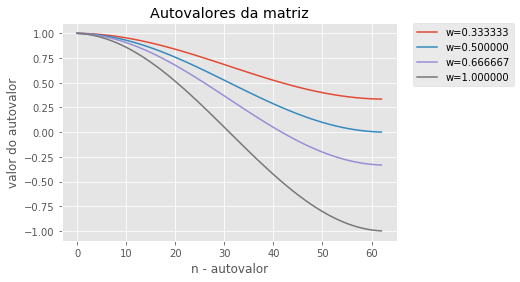

In [93]:
for w in [1.0/3, 1.0/2, 2.0/3, 1]:
    plt.plot(1-2*w*np.power(np.sin(x[1:-1]*np.pi/2),2), label="w=%f"%w)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Autovalores da matriz")
plt.xlabel("n - autovalor")
plt.ylabel("valor do autovalor")

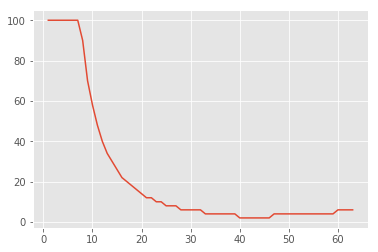

In [94]:
w = 2.0/3
y = []
for k in range(1,N):
    u_ant = np.sin(k*np.pi*x)
    
    erros, iteracoes = Weighted_Jacobi(u, u_ant, w, tol=0.01, max_iter=100)
    y.append(iteracoes)
    
plt.plot(range(1,N), y)

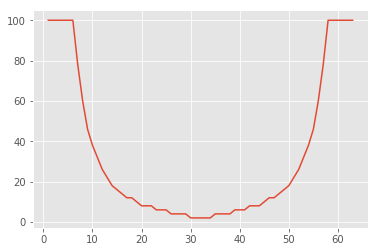

In [95]:
w =1.0
y = []
for k in range(1,N):
    u_ant = np.sin(k*np.pi*x)
    
    erros, iteracoes = Weighted_Jacobi(u, u_ant, w, tol=0.01, max_iter=100)
    y.append(iteracoes)
    
plt.plot(range(1,N), y)

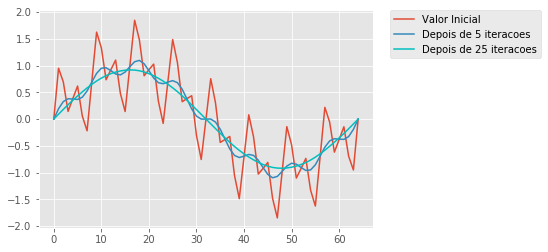

In [96]:
u_ant = np.sin(2*np.pi*x) + 0.5*np.sin(16*np.pi*x) + 0.5*np.sin(32*np.pi*x)
plt.plot(u_ant, label="Valor Inicial")

erros, iteracoes = Weighted_Jacobi(u, u_ant, 2.0/3, max_iter=5)
plt.plot(u_ant, label="Depois de 5 iteracoes")

erros, iteracoes = Weighted_Jacobi(u, u_ant, 2.0/3, max_iter=20)
plt.plot(u_ant, label="Depois de 25 iteracoes", c="c")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Gauss - Seidel

In [97]:
def GS(u, r, tol=0.0, min_iter=0, max_iter=float('inf')):
    erros = []
    erros.append(LA.norm(u_ant, ord=np.inf)) 
    iteracoes = 0
    while iteracoes < min_iter or (erros[-1]>tol and iteracoes < max_iter):
        GS_Step(u[1:-1], r[1:-1])
        erros.append(LA.norm(u, ord=np.inf))
        iteracoes+=1
        
    return erros, iteracoes

def GS_Step(u, r):
    h = 1.0/(len(u)-1)
    for i in range(len(u)):
        u[i] = 0.5*h*h*r[i]
        if i > 0:
            u[i] += 0.5*u[i-1] 
        if i<len(u)-1:
            u[i] += 0.5*u[i+1] 

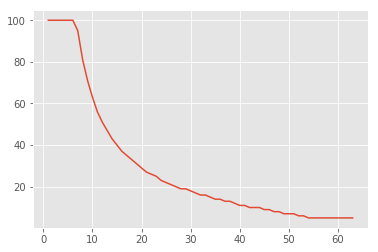

In [98]:
ks = range(1,N)
iters = []
for k in ks:
    u = np.sin(k*np.pi*x)
    r = np.zeros(len(x))
    erros, iteracoes = GS(u,r, tol=0.01, max_iter=100)
    iters.append(iteracoes)
#print erros[-1]
plt.plot(ks, iters)

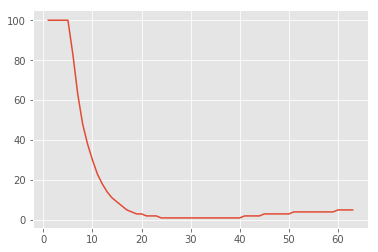

In [99]:
ks = range(1,N)
iters = []
for k in ks:
    u = np.sin(k*np.pi*x)
    r = np.zeros(len(x))
    l = np.cos(np.pi*k*(1.0/N))**2
    #print l
    for j in xrange(len(u)):
        u[j] = u[j]*np.power(l,j)
    
    erros, iteracoes = GS(u,r, tol=0.01, max_iter=100)
    iters.append(iteracoes)
#print erros[-1]
plt.plot(ks, iters)

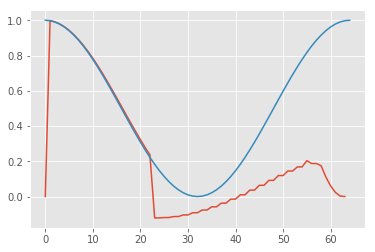

In [100]:
A = operador(N)
D = np.diag(np.diag(A))
L = -np.tril(A, k=-1)
U = -np.triu(A, k=1)   





Rg = LA.inv(np.tril(A))
Rg = np.dot(Rg, U)

lambdas, vs = LA.eig(Rg)


plt.plot(lambdas)

plt.plot(np.power(np.cos(x*np.pi),2))

In [101]:
def w(n,k):
    h = 1.0/n
    

In [102]:
from random import randint

[39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103]


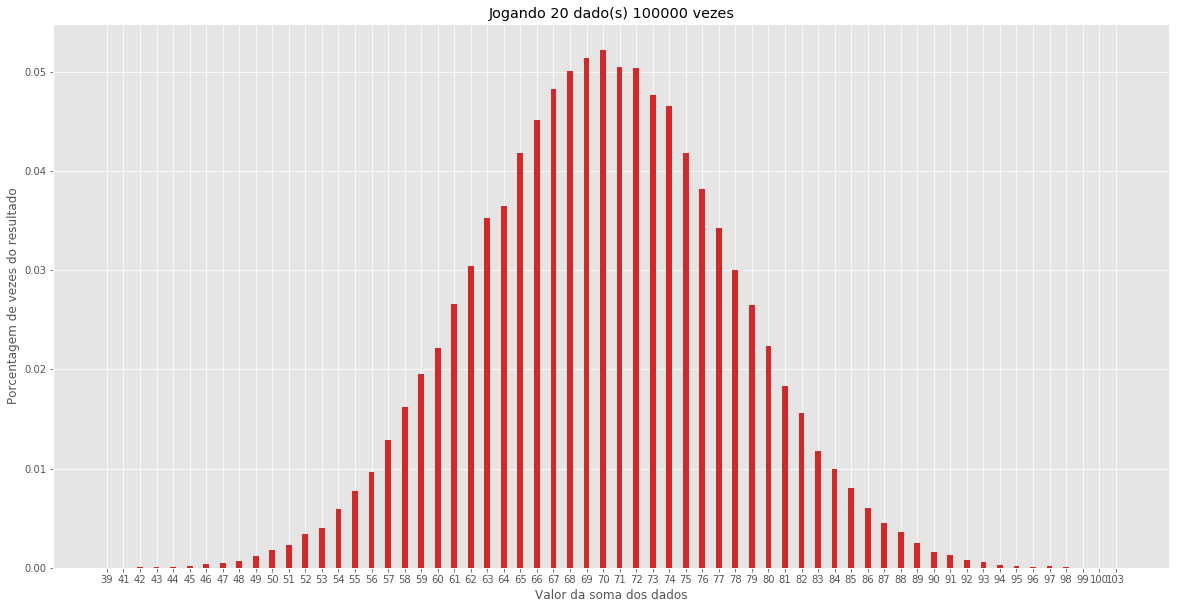

In [103]:
d = {}
n = 100000
dados = 20

for i in range(n):
    r = randint(1,6)
    for i in range(1,dados):
        r+= randint(1,6)
    if r not in d:
        d[r] = 0
    d[r]+=1

k = d.keys()
print k
k.sort()

y = [d[i]/float(n) for i in k]

plt.figure(figsize=(20,10))
p1 = plt.bar(np.arange(len(k)), y, 0.35, color='#d62728')
plt.xticks(np.arange(len(k)), [str(i) for i in k])

plt.title("Jogando %d dado(s) %d vezes" % (dados, n))
plt.xlabel("Valor da soma dos dados")
plt.ylabel("Porcentagem de vezes do resultado")
